#Описание проекта

Описание проекта:

В моём распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведём исследовательский анализ данных и установим параметры, влияющие на цену объектов.

Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

#Шаг 1. Открытие датасета и получение основной информации

Импортируем все необходимые библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Считываем файл

In [2]:
try:
  data = pd.read_csv('real_estate_data.csv', sep='\t')
except:
  data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

Выводим первые 10 строк

In [3]:
pd.set_option('display.max_columns', None)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Основная информация о датасете

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Построим гистограммы для всех численных столбцов

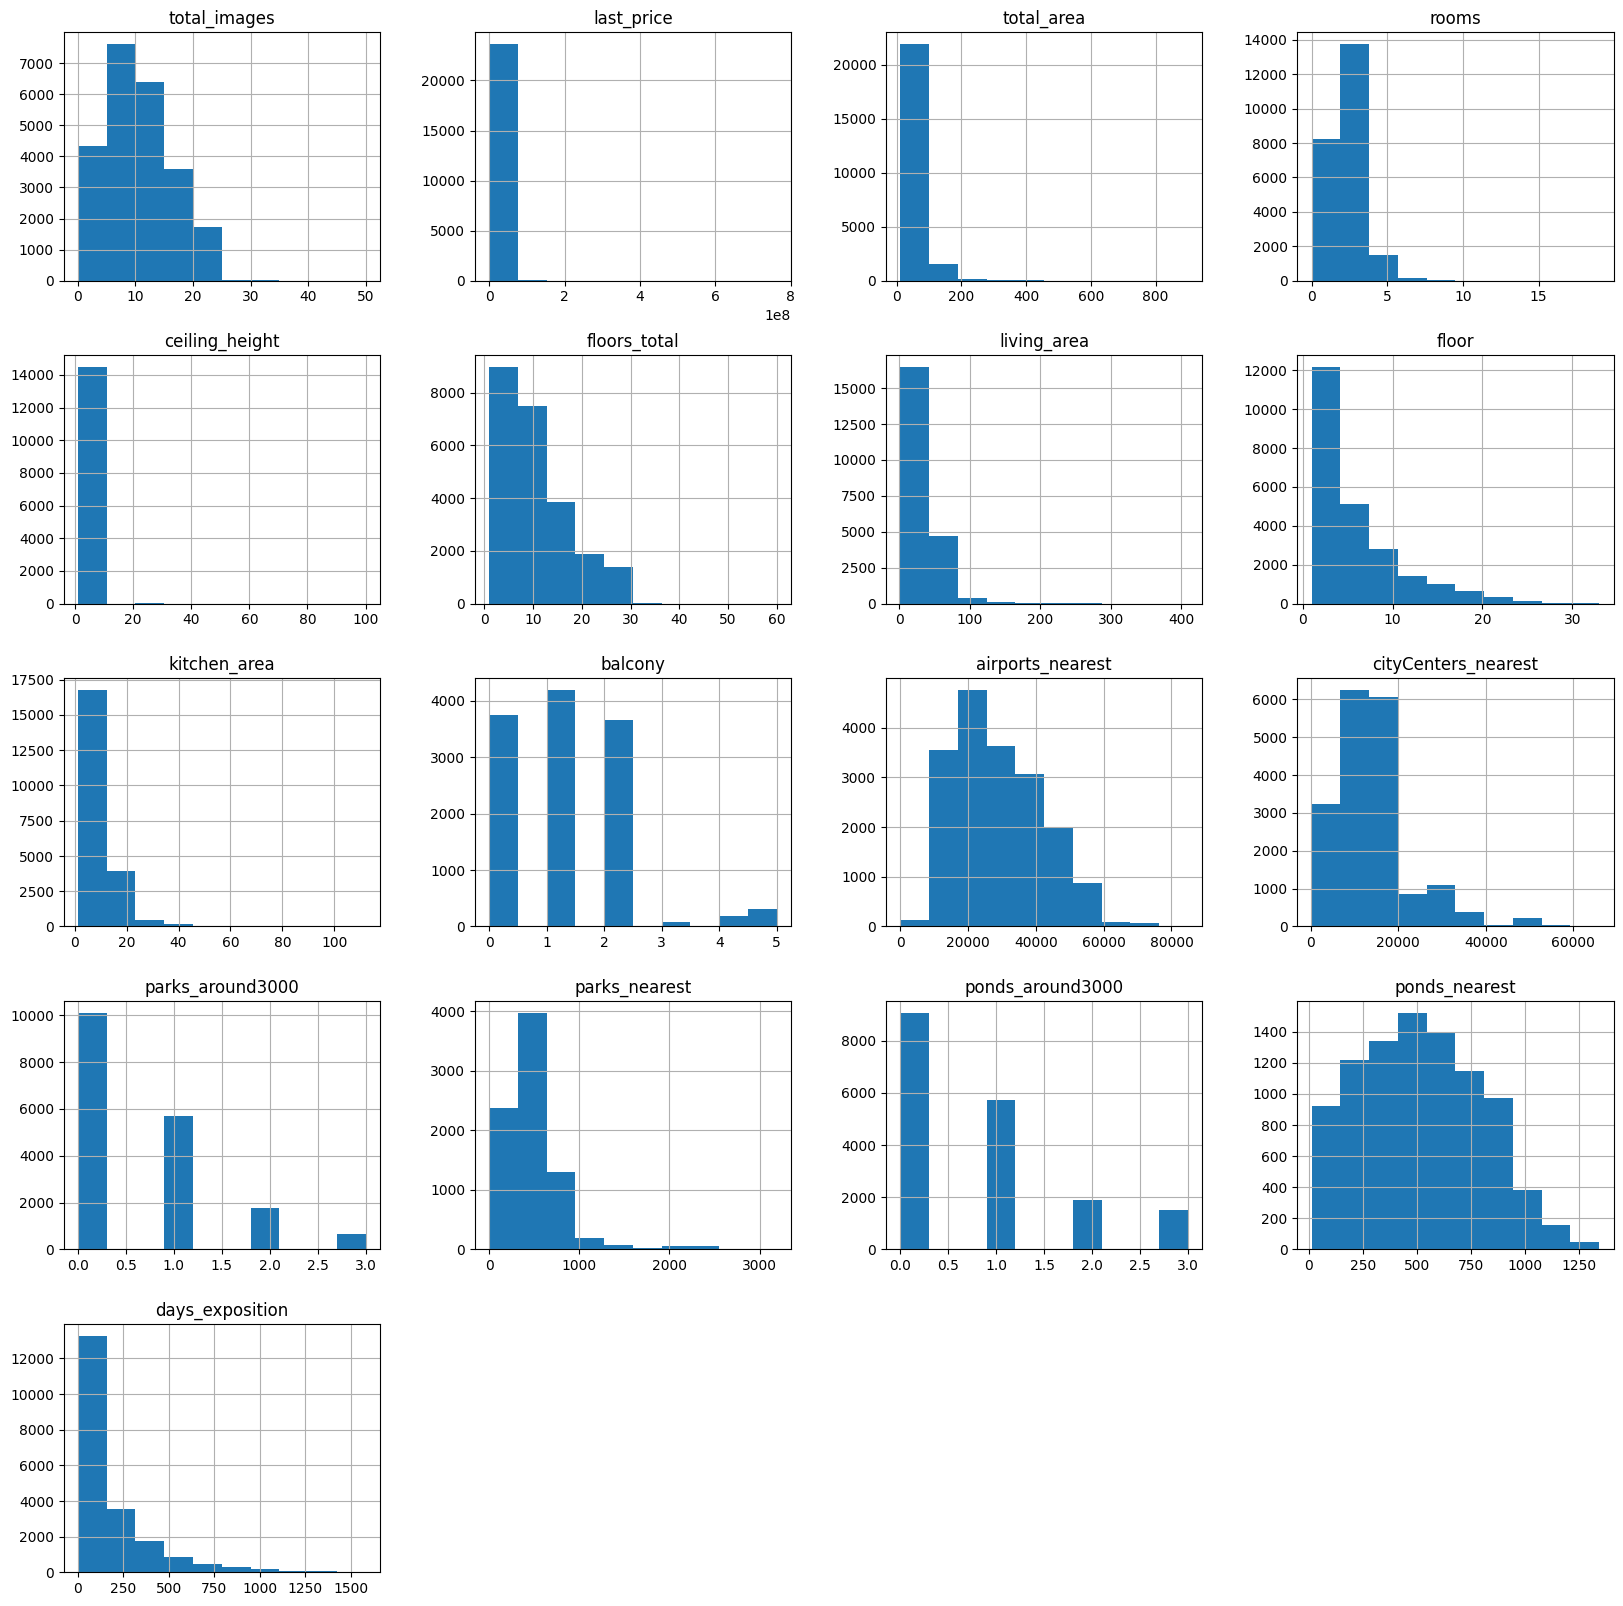

In [5]:
data.hist(figsize=(20,20))
plt.show()

Согласно документации к данным:

*  airports_nearest — расстояние до ближайшего
  аэропорта в метрах (м);
*  balcony — число балконов;
*  ceiling_height — высота потолков в метрах (м);
*  cityCenters_nearest — расстояние до центра города в метрах (м);
*  days_exposition — сколько дней было размещено объявление (от публикации до снятия);
*  first_day_exposition — дата публикации;
*  floor — этаж;
*  floors_total — всего этажей в доме;
*  is_apartment — апартаменты (булев тип);
*  kitchen_area — площадь кухни в квадратных метрах (м²);
*  last_price — цена на момент снятия с публикации;
*  living_area — жилая площадь в квадратных метрах (м²);
*  locality_name — название населенного пункта;
*  open_plan — свободная планировка (булев тип);
*  parks_around3000 — число парков в радиусе 3 км;
*  parks_nearest — расстояние до ближайшего парка (м);
*  ponds_around3000 — число водоёмов в радиусе 3 км;
*  ponds_nearest — расстояние до ближайшего водоёма в метрах (м);
*  rooms — число комнат;
*  studio — квартира-студия (булев тип);
*  total_area — общая площадь квартиры в квадратных метрах (м²);
*  total_images — число фотографий квартиры в объявлении.

Вывод: всего 22 столбца, из них 17 числовых. Заметно, что есть столбцы, у которых неверно указан тип данных, и есть столбцы с пропусками.

# Шаг 2. Предобработка данных. Обработка пропусков и исправление ошибок в данных.


# 2.1 Обработка пропусков

Узнаем количество пропусков в каждом столбце

In [6]:
data.isna().sum()

,0
total_images,0
last_price,0
total_area,0
first_day_exposition,0
rooms,0
ceiling_height,9195
floors_total,86
living_area,1903
floor,0
is_apartment,20924


Теперь посчитаем тоже самое, только в процентном соотношении

In [7]:
data.isna().sum()/data.isna().count()*100

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,38.799105
floors_total,0.362885
living_area,8.029875
floor,0.000000
is_apartment,88.290645


Все пропуски в стобце `balcony` можно заменить на 0, так как скорее всего продавцы не указывают количество балконов тогда, когда балконы отсутствуют.
Также переведем столбец balcony в int.

In [8]:
data['balcony'] = data['balcony'].fillna(value=0).astype('int')

Аналогично, пропуски в столбцах `ponds_around3000` и `parks_around3000` можно заменить на 0 и преобразовать в целый тип данных.

In [9]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0).astype('int')
data['parks_around3000'] = data['parks_around3000'].fillna(value=0).astype('int')

А в стобце `is_apartment` можно все пропуски заменить на False.

In [10]:
data['is_apartment'] = data['is_apartment'].fillna(value=False).astype('bool')

<ipython-input-10-18729f04a889>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['is_apartment'] = data['is_apartment'].fillna(value=False).astype('bool')


Пропуски в столбцах `airports_nearest`, `cityCenters_nearest`, `parks_nearest` и `ponds_nearest` заменим на нехарактерное значение -1, которое будет указывать на пропуск.

In [11]:
data['airports_nearest'] = data['airports_nearest'].fillna(-1)
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(-1)
data['parks_nearest'] = data['parks_nearest'].fillna(-1)
data['ponds_nearest'] = data['ponds_nearest'].fillna(-1)
data['days_exposition'] = data['days_exposition'].fillna(-1).astype(int)

Пропуски в столбце `locality_name` заменим на `No_info`

In [12]:
data['locality_name'] = data['locality_name'].fillna('No_info')

Переведем столбец `studio` в bool

In [13]:
data['studio'] = data['studio'].astype('bool')

Переведем столбец `first_day_exposition` в тип данных datatime, чтобы можно было пользоваться встроенными функциями для последующего анализа.

In [14]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [15]:
data.isna().sum()

,0
total_images,0
last_price,0
total_area,0
first_day_exposition,0
rooms,0
ceiling_height,9195
floors_total,86
living_area,1903
floor,0
is_apartment,0


# Заполнение пропусков, используя связь между столбцами

Попытаемся заполнить оставшиеся пропуски. Для этого будем смотреть корреляцию столбцов с пропусками с другими столбцами.

`floors_total`:

In [16]:
print(data.corr(numeric_only=True).sort_values(by='floors_total', ascending=True)['floors_total'].head(5))
print()
print(data.corr(numeric_only=True).sort_values(by='floors_total', ascending=False)['floors_total'].head(5))

rooms              -0.228215
living_area        -0.169311
parks_around3000   -0.158775
total_area         -0.075774
parks_nearest      -0.063126
Name: floors_total, dtype: float64

floors_total        1.000000
floor               0.678059
balcony             0.172812
kitchen_area        0.163944
airports_nearest    0.163578
Name: floors_total, dtype: float64


Присутствует средняя корреляция с этажом квартиры, но, вероятно, это из-за одноэтажных домов/малоэтажных подъездов, где текущий этаж единственный возможный. Очевидно, что заполнить общее количество этажей по текущему нельзя, например, по информации, что квартира расположена на 1 этаже не следует абсолютно ничего.

Можно было бы попытаться восстановить эти данные по геолокации и адресу, но таких данных у нас нет.

`living_area`:

In [17]:
data.corr(numeric_only=True).sort_values(by='living_area', ascending=False)['living_area'].head(7)

,living_area
living_area,1.000000
total_area,0.939537
rooms,0.845977
last_price,0.566492
kitchen_area,0.428674
parks_around3000,0.212357
ponds_around3000,0.182439


Заметим, что жилая площадь сильно коррелируюет с общей площадью и количеством комнат. Логически это легко объяснимо.

Для начала посмотрим, как отличается отношение жилой площади к общей `ratio_living_area_by_rooms` в зависимости от количества комнат. (При подсчете мы используем именно медианны, чтобы минимизировать влияние выбросов)

In [18]:
median_area = data.groupby(by='rooms').agg({'total_area':np.median,'living_area':np.median})
ratio_living_area_by_rooms = median_area['living_area'] / median_area['total_area']
ratio_living_area_by_rooms

<ipython-input-18-a2cd8f300044>:1: FutureWarning: The provided callable <function median at 0x7e576bd37910> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  median_area = data.groupby(by='rooms').agg({'total_area':np.median,'living_area':np.median})


,0
rooms,
0,0.690979
1,0.481400
2,0.575472
3,0.616438
4,0.640483
5,0.626733
6,0.672273
7,0.677570
8,0.683072


Заметно, что эти величина довольно сильно различаются, поэтому нельзя было просто посчитать жилую площадь как среднее отношение * общая площадь.

Также обратим внимание, что есть некие квартиры с 0 комнат. Посмотрим на них подробнее

  #  2.2 Квартиры без комнат

In [19]:
data.loc[data['rooms']==0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30,0,NaN,24.0,15.50,2,False,True,False,NaN,2,посёлок Мурино,-1.0,-1.0,0,-1.0,0,-1.0,181
349,4,2320000.0,25.00,2017-09-27,0,NaN,14.0,17.00,1,False,False,True,NaN,0,деревня Кудрово,-1.0,-1.0,0,-1.0,0,-1.0,45
440,8,2480000.0,27.11,2018-03-12,0,NaN,17.0,24.75,4,False,True,False,NaN,2,Санкт-Петербург,38171.0,15015.0,0,-1.0,2,982.0,64
508,0,3375000.0,34.40,2017-03-28,0,NaN,26.0,24.30,19,False,False,True,NaN,1,посёлок Парголово,53115.0,19292.0,0,-1.0,1,593.0,430
608,2,1850000.0,25.00,2019-02-20,0,NaN,10.0,NaN,7,False,True,False,NaN,0,посёлок Шушары,-1.0,-1.0,0,-1.0,0,-1.0,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01,0,NaN,25.0,18.00,16,False,True,False,NaN,0,Санкт-Петербург,11405.0,13222.0,0,-1.0,1,623.0,14
23442,0,2500000.0,27.70,2017-09-28,0,NaN,24.0,18.00,4,False,False,True,NaN,2,посёлок Мурино,-1.0,-1.0,0,-1.0,0,-1.0,4
23554,15,3350000.0,26.00,2018-09-07,0,NaN,19.0,NaN,8,False,True,False,NaN,0,Санкт-Петербург,18090.0,17092.0,0,-1.0,2,112.0,31
23592,10,1450000.0,29.00,2017-11-11,0,NaN,9.0,18.00,8,False,False,True,NaN,2,Никольское,-1.0,-1.0,0,-1.0,0,-1.0,82


Заметим, что многие такие квартиры являются студиями, тогда понятен смысл указывать количество комнат нулем. Осталось понять, все ли студии указаны как квартиры с 0 комнат и что за квартиры, которые не студии, но в них 0 комнат

In [20]:
data.loc[data['studio']==True, 'rooms'].unique()

array([0, 1])

Заметим, что некоторые студии выставлены, как однокомнатные квартиры. Исправим это.

In [21]:
data.loc[ (data['rooms']==1) & (data['studio']==True), 'rooms' ] = 0

Теперь все студии имеют 0 комнат. Осталось разобраться с квартирами с 0 комнат но не студиями

Можно предполодить, что хозяева указывают 0 комнат, если квартира - студия. Но также возможно, что они опечатались и настоящее количество комнат - 10. Отсортируем квартиры по стоимости

In [22]:
data.loc[(data['rooms']==0) & (data['studio']==False)].sort_values(by='last_price')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
11331,6,1315000.0,27.32,2017-09-29,0,2.70,15.0,18.7,15,False,False,True,NaN,0,Никольское,-1.0,-1.0,0,-1.0,0,-1.0,116
23592,10,1450000.0,29.00,2017-11-11,0,NaN,9.0,18.0,8,False,False,True,NaN,2,Никольское,-1.0,-1.0,0,-1.0,0,-1.0,82
9586,7,1670000.0,28.30,2017-09-27,0,NaN,9.0,18.2,3,False,False,True,NaN,0,Никольское,-1.0,-1.0,0,-1.0,0,-1.0,45
6805,7,1850000.0,31.00,2017-11-10,0,NaN,18.0,18.0,10,False,False,True,NaN,1,Никольское,-1.0,-1.0,0,-1.0,0,-1.0,7
839,14,1900000.0,35.00,2017-04-14,0,2.70,5.0,15.0,3,False,False,True,NaN,1,поселок Новый Свет,-1.0,-1.0,0,-1.0,0,-1.0,7
1625,7,1980000.0,23.98,2018-02-01,0,NaN,4.0,10.5,3,False,False,True,NaN,1,поселок станции Корнево,-1.0,-1.0,0,-1.0,0,-1.0,120
3019,18,2100000.0,24.00,2017-11-10,0,NaN,10.0,18.0,6,False,False,True,NaN,2,Сертолово,-1.0,-1.0,0,-1.0,0,-1.0,5
9412,5,2100000.0,16.00,2017-12-10,0,NaN,6.0,13.0,1,False,False,True,NaN,0,Санкт-Петербург,20735.0,2111.0,2,228.0,3,72.0,3
946,5,2200000.0,23.00,2016-09-27,0,NaN,27.0,18.0,7,False,False,True,NaN,2,посёлок Мурино,-1.0,-1.0,0,-1.0,0,-1.0,483
1574,0,2200000.0,22.00,2017-11-03,0,NaN,18.0,15.0,16,False,False,True,NaN,1,деревня Кудрово,-1.0,-1.0,0,-1.0,0,-1.0,81


В среднем площадь квартиры около 30м2, что подходит под студию. Поэтому можно все квартиры сделать студиями.

Но последня квартира очень сильно выбивается, как по цене, так и по площади. Сравним её данные с данными по 10 комнатным квартирам.

Проверим 10комнатные квартиры

In [23]:
data.loc[(data['rooms']==10) ]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
4149,6,23000000.0,272.6,2018-01-11,10,3.14,7.0,145.9,7,False,False,False,18.8,1,Санкт-Петербург,10726.0,12169.0,1,191.0,1,531.0,-1
18119,4,15500000.0,216.1,2016-07-04,10,3.15,5.0,161.4,2,False,False,False,19.8,0,Санкт-Петербург,24353.0,4921.0,1,368.0,0,-1.0,11
18891,11,40000000.0,290.0,2016-06-21,10,3.50,6.0,189.4,6,False,False,False,30.0,1,Санкт-Петербург,26229.0,4932.0,3,316.0,1,227.0,77


Данные схожи с нашей второй "квартирой без комнат". Наша догадка подтвердилась.

In [24]:
data.loc[19392, 'rooms'] = 10

Остальные квартиры без комнат можно записать в студии.

In [25]:
data['studio'] = data['studio'].where(data['rooms']!=0, True)

# Заполнение пропусков площади

Можно заполнить пропуски следующим образом:
* Сгруппировать данные по количеству комнат(т.к. это и количественная, и **категориальная** переменная)
* Рассчитать отношение медианной жилой площади к медианной общей площади при каждом значении количества комнат `procent_living_area_by_rooms`.
* Заполнить пропуск по формуле: общая площадь * отношение медианной жилой площади к медианной общей площади при данном значении количества комнат

Итак, пробежимся по уникальным значениям `data['rooms']` количества комнат, используя цикл for.  `ind` - индекс, указывающий на текущее количество комнат.

`procent_living_area_by_rooms` - отношение медианной жилой площади к медианной общей площади для данного количества комнат.

В последней строке кода мы пробегаем по тем строкам, где нет информации о жилой площади (`data['living_area']` - пропуск) и в которых количествам комнат  равно `ind` (`data['rooms']` равно `ind`). Рассчитываем пропущенное значение по вышеуказанной формуле: отношение * общую площадь (`data['total_area'] * procent_living_area_by_rooms`)

In [26]:
for ind in data['rooms'].unique():
  ratio_living_area_by_rooms = (
  data.query('rooms == @ind')['living_area'].median()
  / data.query('rooms == @ind')['total_area'].median()
  )
  data.loc[ (data['living_area'].isna()) & (data['rooms']==ind), 'living_area' ] = data['total_area'] * ratio_living_area_by_rooms

Проверим проделанную работу:

In [27]:
print(data[['living_area', 'rooms', 'total_area']].head(20))

    living_area  rooms  total_area
0     51.000000      3      108.00
1     18.600000      1       40.40
2     34.300000      2       56.00
3     98.013699      3      159.00
4     32.000000      2      100.00
5     14.400000      1       30.40
6     10.600000      1       37.30
7     41.203774      2       71.60
8     15.430000      1       33.16
9     43.600000      3       61.00
10    20.300000      1       39.60
11    31.000000      2       44.00
12    30.000000      2       54.00
13    27.000000      2       42.80
14    17.000000      1       36.00
15    20.500000      1       39.00
16    55.600000      3       82.00
17    16.500000      1       36.00
18    19.400000      1       31.00
19    76.000000      3      121.00


Всё заполнилось нужным образом

Теперь займемся площадью кухни `kitchen_area`.

In [28]:
data[['kitchen_area', 'total_area']].head(10)

,kitchen_area,total_area
0,25.00,108.00
1,11.00,40.40
2,8.30,56.00
3,NaN,159.00
4,41.00,100.00
5,9.10,30.40
6,14.40,37.30
7,18.90,71.60
8,8.81,33.16
9,6.50,61.00


In [29]:
data.corr(numeric_only=True).sort_values(by='kitchen_area', ascending=False)['kitchen_area'].head(7)

,kitchen_area
kitchen_area,1.000000
total_area,0.609121
last_price,0.519869
living_area,0.436321
rooms,0.269945
ponds_around3000,0.175719
floors_total,0.163944


Тут уже связи с количеством комнат или другими категориальными переменными нет. Присутствует средняя корреляция лишь с общей площадью `total_area`.

Пропущенные значения площади кухни заменим по формуле:

Общая площадь квартиры * среднее отношение площади кухни к площади квартиры.
(Округлим до сотых)

In [30]:
ratio_of_kitchen_area = (data['kitchen_area'] / data['total_area']).median()
ratio_of_kitchen_area

0.1724137931034483

In [31]:
data.loc[:,'kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] * ratio_of_kitchen_area)

Но, минимальная возможная площадь кухни по закону - 5 кв.м. Удалим те предложения, в которых кухня <5 м2.

In [32]:
data = data.loc[data['kitchen_area']>=5 ]

Проверим:

In [33]:
data[['kitchen_area', 'total_area']].head(10)

,kitchen_area,total_area
0,25.000000,108.00
1,11.000000,40.40
2,8.300000,56.00
3,27.413793,159.00
4,41.000000,100.00
5,9.100000,30.40
6,14.400000,37.30
7,18.900000,71.60
8,8.810000,33.16
9,6.500000,61.00


# 2.2 Обработка дубликатов

Исправим возможные дубликаты в столбце locality_name

In [34]:
data['locality_name'].sort_values().unique()

array(['No_info', 'Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск',
       'Выборг', 'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород',
       'Каменногорск', 'Кингисепп', 'Кириши', 'Кировск', 'Колпино',
       'Коммунар', 'Красное Село', 'Кронштадт', 'Кудрово',
       'Лодейное Поле', 'Ломоносов', 'Луга', 'Любань', 'Мурино',
       'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф',
       'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин',
       'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк',
       'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно',
       'Шлиссельбург', 'городской поселок Большая Ижора',
       'городской поселок Янино-1', 'городской посёлок Будогощь',
       'городской посёлок Виллози', 'городской посёлок Лесогорский',
       'городской посёлок Мга', 'городской посёлок Назия',
       'городской посёлок Новоселье', 'городской посёлок Павлово',
       'городской посёлок Рощино', 'городской посёлок Свирьстрой',
       'город

Заметим, что перед названием населенного пункта встречаются такие слова как деревня, поселок и т.п.

Напишем функцию `name_redactor`, которая будет удалять тип населенного пункта в его названии. (удалим из названия все слова, начинающиеся с маленькой буквы





In [35]:
def name(data):
  name_ = str(data['locality_name']).split()
  new_name=''
  for i in name_:
    if not(i[0].islower()):
      new_name = f'{new_name} {i}'
  return new_name.strip()
data['locality_name'] = data.apply(name, axis=1)

Проверим результат

In [36]:
data['locality_name'].sort_values().unique()

array(['No_info', 'Агалатово', 'Александровская', 'Алексеевка', 'Аннино',
       'Аро', 'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпосёлок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород

Всё работает

#Шаг 3. Добавление новых столбцов

Еще раз посмотрим информацию о таблице

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23254 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23254 non-null  int64         
 1   last_price            23254 non-null  float64       
 2   total_area            23254 non-null  float64       
 3   first_day_exposition  23254 non-null  datetime64[ns]
 4   rooms                 23254 non-null  int64         
 5   ceiling_height        14319 non-null  float64       
 6   floors_total          23178 non-null  float64       
 7   living_area           23254 non-null  float64       
 8   floor                 23254 non-null  int64         
 9   is_apartment          23254 non-null  bool          
 10  studio                23254 non-null  bool          
 11  open_plan             23254 non-null  bool          
 12  kitchen_area          23254 non-null  float64       
 13  balcony              

Теперь данные готовы для анализа. Всем столбцам соответствуют правильные типы данных, а пропущенные значения по возможности дополнены. Также учтены некоторые возможные ошибки в самых данных.

Добавим столбец `price_for_metre`, который будет указывать на цену квадратного метра в рублях. Чтобы рассчитать стоимость квадратного метра необходимо общую стоимость `last_price` поделить на общее количество метров `total_area`. Округлим результат до целого.

In [38]:
data['price_for_metre'] = round(data['last_price'] / data['total_area'],0).astype(int)
print(data['price_for_metre'].head(5))

0    120370
1     82921
2     92786
3    408176
4    100000
Name: price_for_metre, dtype: int64


Добавим столбцы:

  `weekday_of_public` - день недели публикации объявления

  `month_of_public` - месяц публикации объявления

  `year_of_public` - год публикации объявления

Все инструменты для этого есть в библиотеке pandas. Было необходимо только перевести столбец `first_day_exposition` перевести в тип данных `datetime64[ns]` во время предобработки.

In [39]:
data['weekday_of_public'] = pd.DatetimeIndex(data['first_day_exposition']).weekday
data['month_of_public'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year_of_public'] = pd.DatetimeIndex(data['first_day_exposition']).year
print(data['weekday_of_public'].head(5))
print(data['month_of_public'].head(5))
print(data['year_of_public'].head(5))

0    3
1    1
2    3
3    4
4    1
Name: weekday_of_public, dtype: int32
0     3
1    12
2     8
3     7
4     6
Name: month_of_public, dtype: int32
0    2019
1    2018
2    2015
3    2015
4    2018
Name: year_of_public, dtype: int32


Добавим новый столбец `type_of_floor` - тип этажа квартиры (значения — «Первый», «Последний», «Другой»).

Для этого напишем функцию `type_of_floor`.

In [40]:
def type_of_floor(data):
  if data['floor']==1:
    return 'Первый'
  if data['floor']==data['floors_total']:
    return 'Последний'
  return 'Другой'
data['type_of_floor'] = data.apply(type_of_floor, axis=1)
print(data['type_of_floor'].head(10))

0    Другой
1    Первый
2    Другой
3    Другой
4    Другой
5    Другой
6    Другой
7    Другой
8    Другой
9    Другой
Name: type_of_floor, dtype: object


Добавим новый столбец `cityCenters_nearest_km` - расстояние до центра города в километрах.

Для этого поделим расстояние от центра города в метрах `cityCenters_nearest` на 1000. Также переведем полученные значения в целый тип.

In [41]:
data['cityCenters_nearest_km']=(data['cityCenters_nearest']/1000).astype(int)
data['cityCenters_nearest_km'].head(5)

,cityCenters_nearest_km
0,16
1,18
2,13
3,6
4,8


#Шаг 4. Исследовательский анализ данных

Даны задачи:

# Задача 1




1)Изучите перечисленные ниже параметры объектов и постройте отдельные гистограммы для каждого из этих параметров. В некоторых параметрах встречаются редкие и выбивающиеся значения. При построении гистограмм удалите их. Если природа аномалии понятна и данные действительно искажены, то восстановите корректное значение. В противном случае удалите редкие и выбивающиеся значения.


Список параметров:
*   общая площадь;
*   жилая площадь;
*   площадь кухни;
*   цена объекта;
*   количество комнат;
*   высота потолков;
*   тип этажа квартиры («первый», «последний», «другой»);
*   общее количество этажей в доме;
*   расстояние до центра города в метрах;
*   расстояние до ближайшего парка




#  4.1.1 Удалим все редкие и выбивающиеся значения.

Необходимо понять, в каком диапазоне лежат: общая площадь, цена, кол-во комнат

In [42]:
data[['last_price','total_area','rooms','ceiling_height','living_area','kitchen_area']].describe()

,last_price,total_area,rooms,ceiling_height,living_area,kitchen_area
count,2.325400e+04,23254.00000,23254.000000,14319.000000,23254.000000,23254.000000
mean,6.613052e+06,60.97847,2.094822,2.770663,34.949817,10.612137
std,1.097698e+07,35.68047,1.071236,1.252672,22.816578,6.021729
min,1.219000e+04,20.00000,0.000000,1.000000,2.000000,5.000000
25%,3.500000e+06,40.70000,1.000000,2.510000,19.000000,7.000000
50%,4.700000e+06,52.50000,2.000000,2.650000,30.200000,9.137931
75%,6.800000e+06,70.00000,3.000000,2.800000,42.700000,12.000000
max,7.630000e+08,900.00000,19.000000,100.000000,427.546729,112.000000


Заметим, что в данных существуют потолки 100м, жилая площадь 2 м2 и кухня площадью 1м2. Очевидно, в данных какая-то ошибка. Необходимо исправить или удалить данные.

Разброс `std` довольно велик во многих столбцах, поэтому имеет смысл избавиться от редких значений.

Высота потолков `ceiling_height` вряд ли может быть >10 м. Уменьшим все "подозрительные" значения в 10 раз. Да и быть меньше 2 метров тоже не может, удалим такие данные.

In [43]:
data.loc[data['ceiling_height']>10, 'ceiling_height'] /=10

Потолок ниже 2 метров тоже является чем-то странным. Очистим таблицу и от таких значений.

In [44]:
data = data.drop(data[data['ceiling_height']<=2].index)

Жилая площаль `living_area` не может быть меньше 10 м2. Удалим такие значения.

In [45]:
data = data.drop(data[data['living_area']<10].index)

Построим диаграммы размаха, подкрепленные математическими данными для столбцов: `last_price`,`total_area`,`rooms`,`ceiling_height`,`living_area`,`kitchen_area`.

Найдем нижний и верхний квартили, межквартильный диапазон. Соответственно в переменные `Q1`, `Q3`, `interquartile_range`.

Рассчитаем минимально `min_normal_value` и максимально `max_normal_value` допустимые значения, как нижний/верхний квартиль -/+ 1.5 межквартильных диапазона, но не меньше/больше, чем минимальное/максимальное значение.

Выведем на экран данные о минимальном нормальном значении, максимальном нормальном значении, `Q1`, `Q3`, `interquartile_range`.

Также посчитаем в процентном соотношении количество выбросов(как количество выбрасов/общее количество * 100%) и выведем информацию на экран.

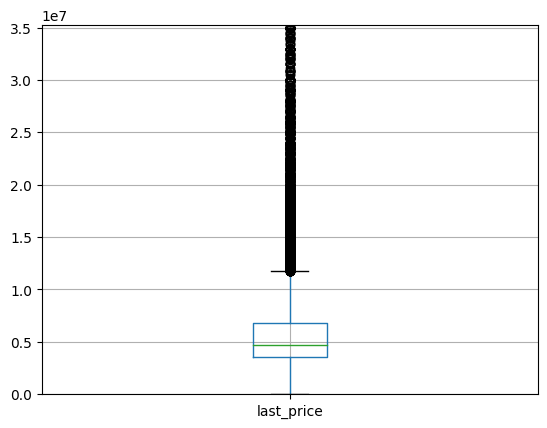

Минимальное нормальное значение last_price: 12190.0; максимальное - 11765041.25; Q1=3500000.0; Q3=6806016.5; iq=3306016.5 
Процентное количество выбросов: 8.972646995477064%


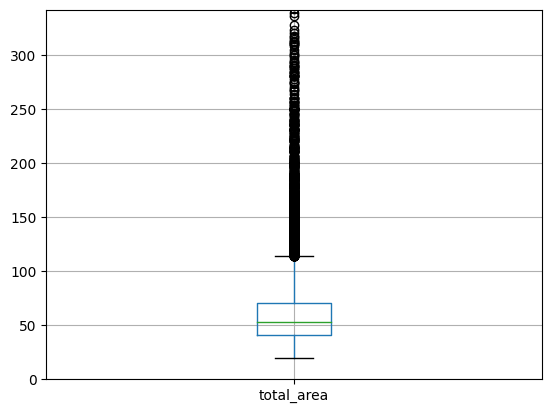

Минимальное нормальное значение total_area: 20.0; максимальное - 113.94999999999999; Q1=40.7; Q3=70.0; iq=29.299999999999997 
Процентное количество выбросов: 5.483523583889727%


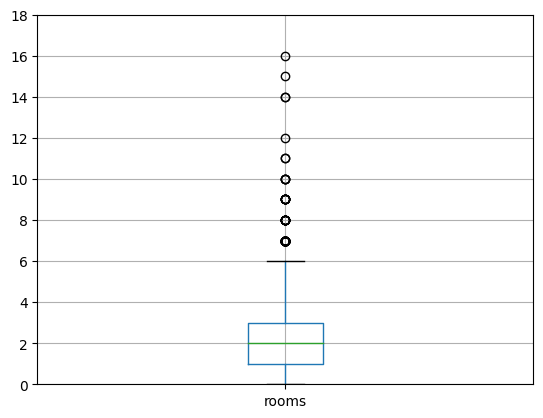

Минимальное нормальное значение rooms: 0.0; максимальное - 6.0; Q1=1.0; Q3=3.0; iq=2.0 
Процентное количество выбросов: 0.39198793883265126%


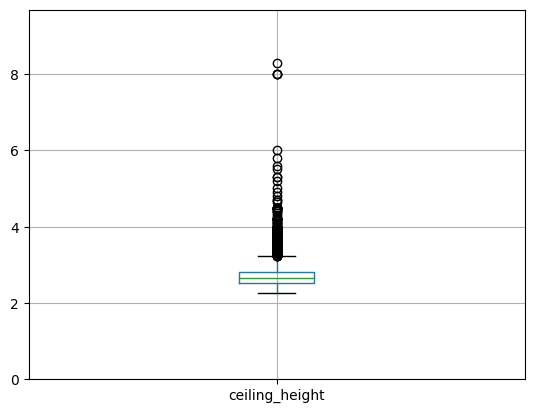

Минимальное нормальное значение ceiling_height: 2.25; максимальное - 3.23125; Q1=2.5124999999999997; Q3=2.8; iq=0.2875000000000001 
Процентное количество выбросов: 3.3426663794960154%


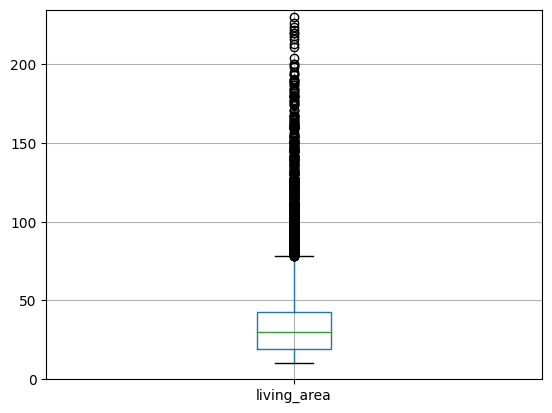

Минимальное нормальное значение living_area: 10.0; максимальное - 78.25; Q1=19.0; Q3=42.7; iq=23.700000000000003 
Процентное количество выбросов: 3.7001938401895327%


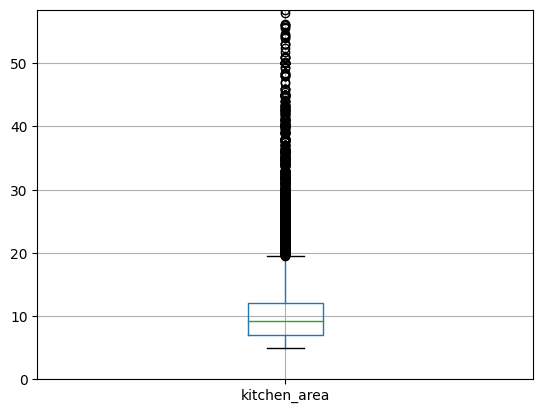

Минимальное нормальное значение kitchen_area: 5.0; максимальное - 19.5; Q1=7.0; Q3=12.0; iq=5.0 
Процентное количество выбросов: 5.608442817144088%


In [46]:
for ind in ['last_price','total_area','rooms','ceiling_height','living_area','kitchen_area']:
  min_value = data[ind].describe()['min']
  max_value = data[ind].describe()['max']
  Q1 = data[ind].describe()['25%']
  Q3 = data[ind].describe()['75%']
  interquartile_range = Q3 - Q1
  min_normal_value = max(Q1 - 1.5 * interquartile_range, min_value)
  max_normal_value = min(Q3 + 1.5 * interquartile_range, max_value)
  data.boxplot(ind)
  plt.ylim(0,max_normal_value*3)
  plt.show()
  count_of_outlier = data.loc[data[ind]>max_normal_value].shape[0]
  count_of_all = data.shape[0]
  print(f'Минимальное нормальное значение {ind}: {min_normal_value}; максимальное - {max_normal_value}; Q1={Q1}; Q3={Q3}; iq={interquartile_range} ');
  print(f'Процентное количество выбросов: {count_of_outlier/count_of_all*100}%')

Из представленных статистических данных и диаграмм размаха можно исключить из данных редкие/аномальные значения, а именно установить диапазоны:

* Цена квартиры `last_price` <  12000000
* Общая площадь `total_area` < 115 м2
* Количество комнат `rooms` < 7
* Высота потолка `ceiling_height` < 3.3 м
* Жилая площадь `living_area` < 80 м2
* Площадь кухни `kitchen_area` < 20 м2

Т.к. в столбце `ceiling_height` остались пропуски, то это тоже следует предусмотреть при написании условия, чтобы не потерять кучу данных.

In [47]:
good_data = data.query('last_price < 12000000 and total_area < 115 and rooms < 7 and living_area < 80 and kitchen_area < 20 and (ceiling_height.isna() or ceiling_height<3.3)')

Проверим, какой процент данных остался

In [48]:
print(good_data.shape[0]/data.shape[0])

0.8730562136549644


Осталось больше 87%. Данных хватит, но редких и странных значений уже не будет

In [49]:
good_data[['last_price','total_area','rooms','ceiling_height','living_area','kitchen_area']].describe()

,last_price,total_area,rooms,ceiling_height,living_area,kitchen_area
count,2.026800e+04,20268.000000,20268.000000,12203.000000,20268.000000,20268.000000
mean,4.760118e+06,52.525377,1.922291,2.658570,30.139117,9.207838
std,2.128683e+06,17.031558,0.871545,0.172092,12.433578,2.902865
min,4.300000e+05,20.000000,0.000000,2.250000,10.000000,5.000000
25%,3.300000e+06,39.000000,1.000000,2.500000,18.200000,7.000000
50%,4.388000e+06,49.000000,2.000000,2.600000,29.000000,8.805000
75%,5.850000e+06,62.600000,3.000000,2.750000,39.000000,11.000000
max,1.199900e+07,114.800000,6.000000,3.280000,79.400000,19.940000


Средние значения изменились, но совсем немного. А вот от выбросов мы избавились.

# 4.1.2 Строим гистограммы



*   общая площадь - `total_area`










Видим нормальное распределение Гаусса, что логично для данной величины. Среднее значение величины лежит в диапазоне от 30 до 60 метров.

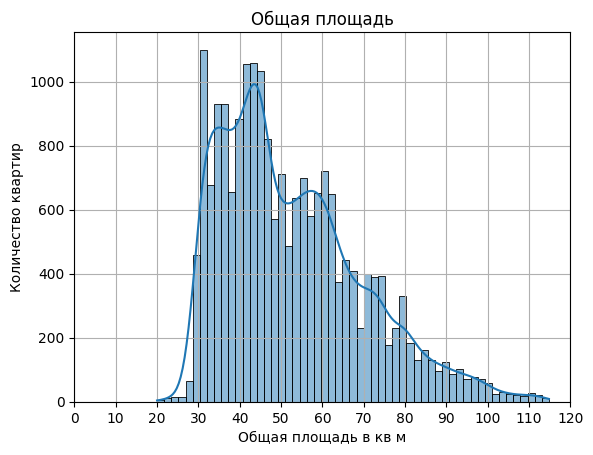

In [50]:
sns.histplot(good_data['total_area'], kde=True)
plt.title("Общая площадь")
plt.xlabel("Общая площадь в кв м")
plt.ylabel("Количество квартир")
plt.grid()
plt.xticks(range(0,130,10))
plt.show()

*   жилая площадь - `living_area`

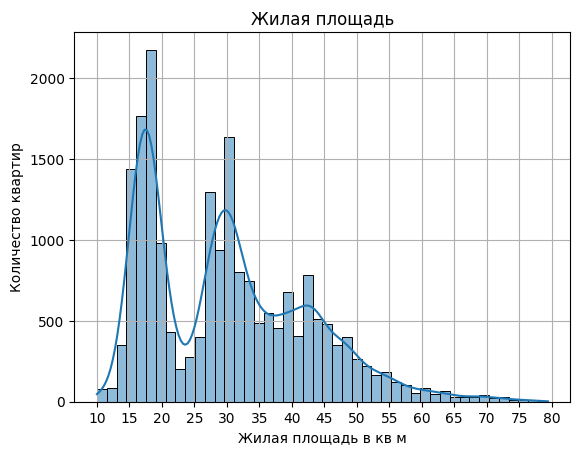

In [51]:
sns.histplot(good_data['living_area'], kde=True)
plt.title("Жилая площадь")
plt.xlabel("Жилая площадь в кв м")
plt.ylabel("Количество квартир")
plt.grid()
plt.xticks(range(10,85,5))
plt.show()

Видим 2 пика: самый большоей около 18 м2 и 30м2.

Первый пик соответствует однокомнатным квартирам.

In [52]:
good_data.query('rooms==1')['living_area'].median()

17.7

 А второй - двухкомнатым.

In [53]:
good_data.query('rooms==2')['living_area'].median()

30.3

Можно предположить, что однокомнатные и двухкомнатные квартиры доминируют на рынке.

Также видим длинный хвост вправо, что соответствует многокомнатным квартирам

*   площадь кухни - `kitchen_area`

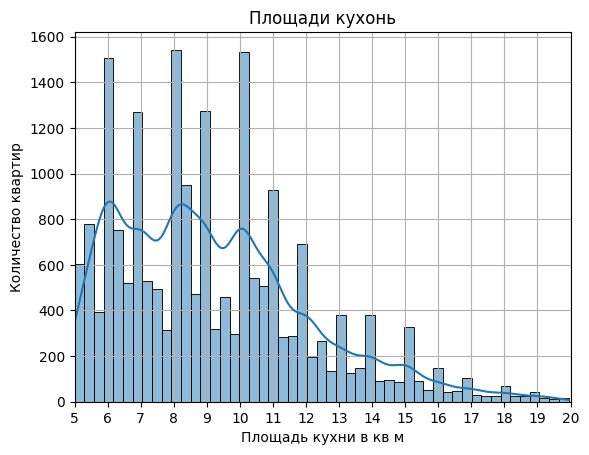

In [54]:
sns.histplot(good_data['kitchen_area'], kde=True)
plt.title("Площади кухонь")
plt.xlabel("Площадь кухни в кв м")
plt.ylabel("Количество квартир")
plt.grid()
plt.xticks(range(0,21,1))
plt.xlim(5,20)
plt.show()

Видим пики на целых значениях, а в остальном - большинство значений лежат в диапазоне 6-10 м2

*   цена объекта - `last_price`

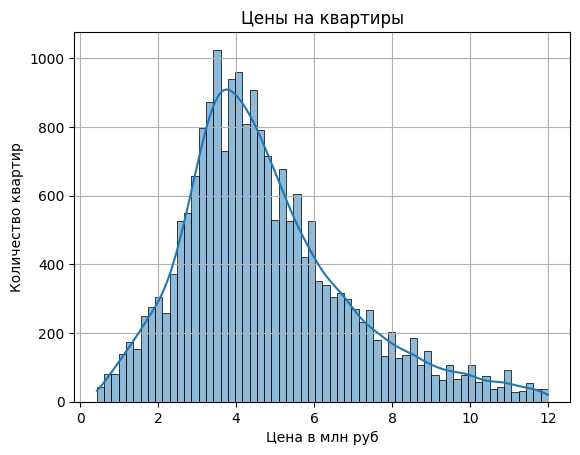

In [55]:
sns.histplot(good_data['last_price']/1000000, kde=True)
plt.title("Цены на квартиры")
plt.xlabel("Цена в млн руб")
plt.ylabel("Количество квартир")
plt.grid()
plt.show()

Видим нормальное распределение. Средняя цена около 3-5 млн рублей.

*   количество комнат - `rooms`

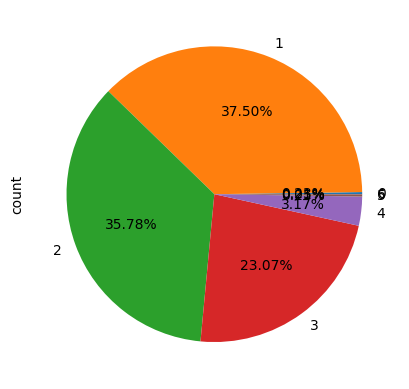

In [56]:
count_by_rooms = good_data.pivot_table(index='rooms', values='last_price', aggfunc='count')
count_by_rooms.columns=['count']
count_by_rooms.plot(kind='pie', y='count', autopct='%1.2f%%', legend=False)
plt.show()

Гипотеза про доминирование однокомнатных и двухкомнатных квартир подтвердилась.

Можно объеденить все квартиры с количеством комнат >3 в одну группу.

Посмотрим на многокомнатные квартиры подробнее

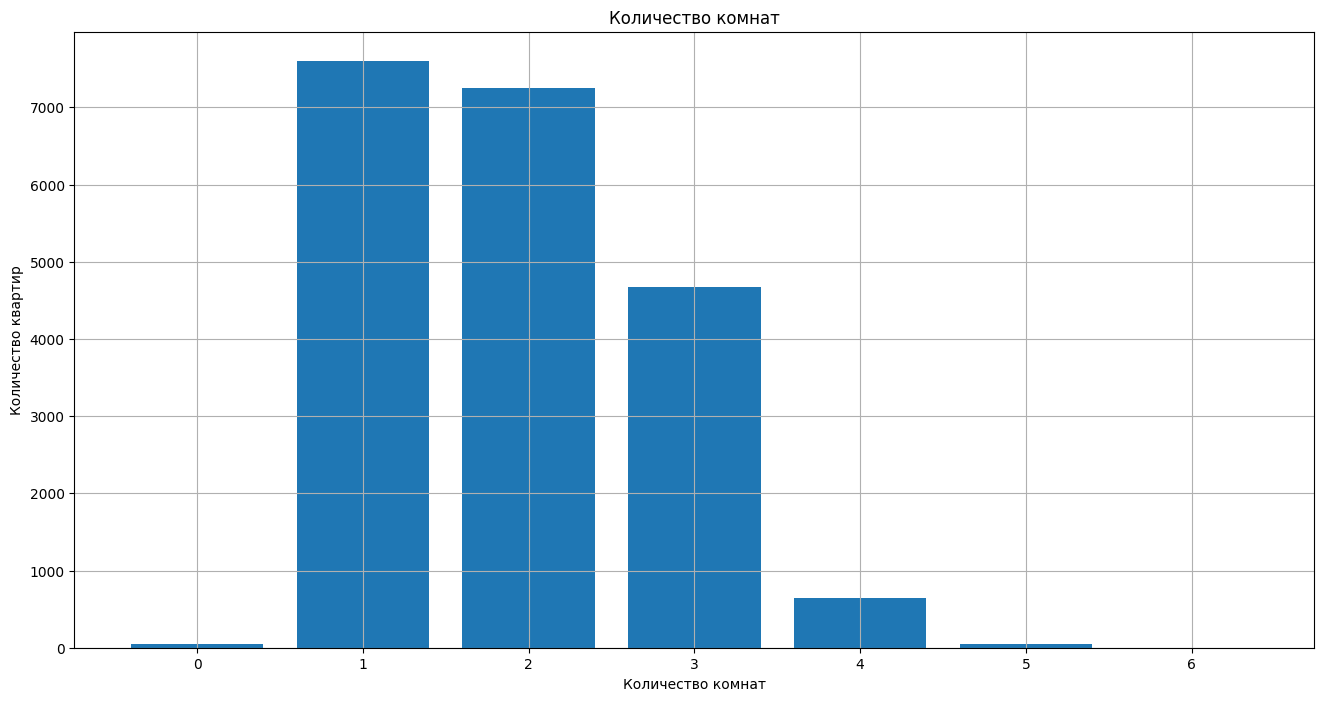

In [57]:
fig = plt.figure(figsize=(16,8))

grouped_1 = good_data.groupby(by='rooms')
a_1 = grouped_1['last_price'].count()
x_1=[np.array([])]
y_1=[np.array([])]
for i in range(len(a_1)):
  x_1 = np.append(x_1,a_1.index[i])
  y_1 = np.append(y_1,a_1[i])
ax_1 = fig.add_subplot(1,1,1)
ax_1.bar(x_1, y_1)
ax_1.grid()
ax_1.set_title("Количество комнат")
ax_1.set_ylabel("Количество квартир")
ax_1.set_xlabel("Количество комнат")
plt.show()

*   высота потолков - `ceiling_height`

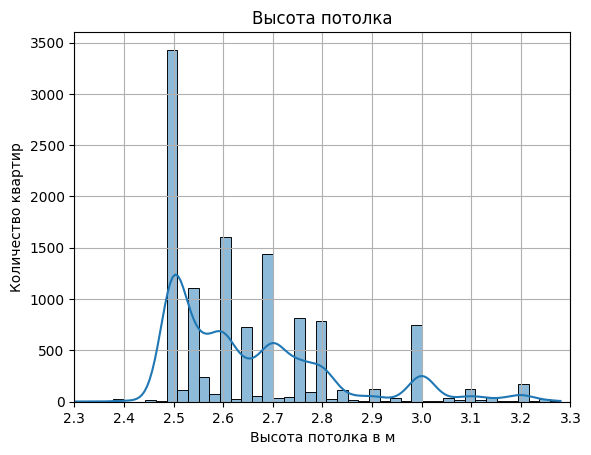

In [58]:
sns.histplot(good_data['ceiling_height'], kde=True)
plt.title("Высота потолка")
plt.xlabel("Высота потолка в м")
plt.ylabel("Количество квартир")
plt.grid()
plt.xticks(np.arange(2,3.4,0.1))
plt.xlim((2.3,3.3))
plt.show()

Видим главный пик - 2.5 м. Также видим пики на 2.6 м, 2.7 м, 2.8 м, 3.0 м.
Большая часть значений лежит в диапазоне 2.5 м - 2.8 м.

*   тип этажа квартиры («первый», «последний», «другой») - `type_of_floor`

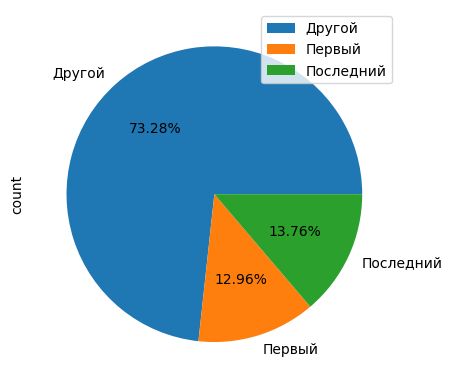

In [59]:
count_by_type_floors = good_data.pivot_table(index='type_of_floor', values='last_price', aggfunc='count')
count_by_type_floors.columns=['count']
count_by_type_floors.plot(kind='pie', y='count', autopct='%1.2f%%')
plt.show()

Логично, что первых и последних этажей сильно меньше, чем остальных.

*   общее количество этажей в доме - `floors_total`

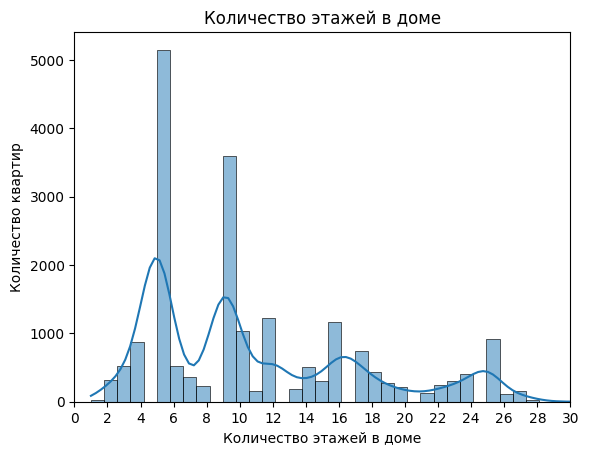

In [60]:
sns.histplot(good_data['floors_total'], kde=True)
plt.title("Количество этажей в доме")
plt.xlabel("Количество этажей в доме")
plt.ylabel("Количество квартир")
plt.xlim((0,30))
plt.xticks(range(0,32,2))
plt.show()

Наиболее популярны дома с общим количеством этажей: 5,9,12,16 - совпадает с наблюдением из реального мира.

*   расстояние до центра города в метрах - `cityCenters_nearest`

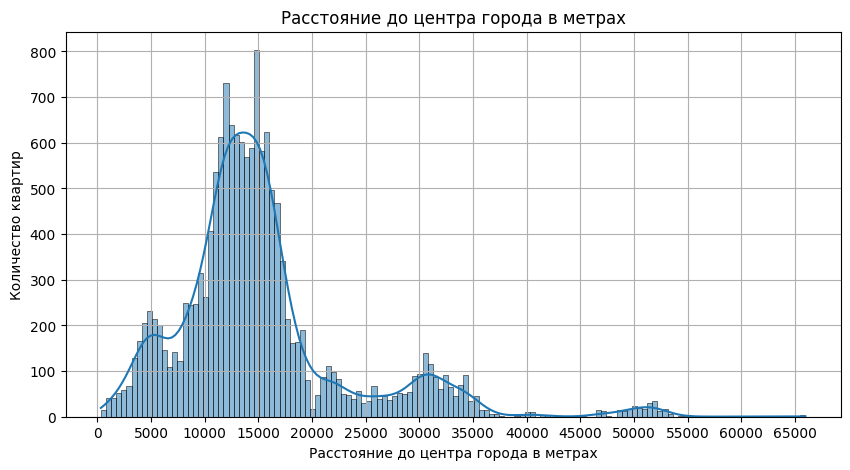

In [61]:
fig = plt.figure(figsize=(10,5))
metre_to_centre = good_data.loc[good_data['cityCenters_nearest']>0, 'cityCenters_nearest']
sns.histplot(metre_to_centre, kde=True)
plt.title("Расстояние до центра города в метрах")
plt.xlabel("Расстояние до центра города в метрах")
plt.ylabel("Количество квартир")
plt.xticks(range(0,70000,5000))
plt.grid()
plt.show()

Наиболее частое расстояние до центра: от 10000 м до 15000 м. (У тех квартир, где расстояние указано)

Количество объявлений без информации о расстоянии до центра города

In [62]:
good_data.loc[good_data['cityCenters_nearest']<0, 'cityCenters_nearest'].count()

5150

Количество пропусков слишком велико, так что информацию о среднем из всех данных делать нельзя.

*   расстояние до ближайшего парка - `parks_nearest`

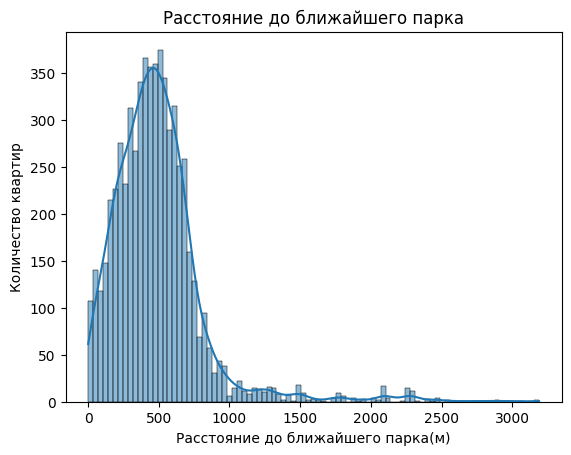

In [63]:
metre_to_park = good_data.loc[data['parks_nearest']>0,'parks_nearest']
sns.histplot(metre_to_park, kde=True)
plt.title("Расстояние до ближайшего парка")
plt.xlabel("Расстояние до ближайшего парка(м)")
plt.ylabel("Количество квартир")
plt.show()

Наиболее частое расстояние до близжайшего парка: до 800 метров. (У тех квартир, где расстояние указано)

Количество объявлений без информации о расстоянии до близжайшего парка

In [64]:
good_data.loc[good_data['parks_nearest']<0, 'parks_nearest'].count()

14066

Количество пропусков слишком велико, так что информацию о среднем из всех данных делать нельзя.

# 4.1.3 Вывод по гистограммам. Обобщенный образ квартиры:


Наиболее популярное предложение:


*   Общая площадь 30-60 м
*   Количество комнат: 1-2
*   Цена: 3-4 млн рублей.
*   Высота потолков: 2.5-2.8 м
*   Не первый и не последний этаж
*   Расстояние до центра города 10-15 км.
*   Информации о близжайшем парке нет

# Задача 2

2) Изучите, как быстро продавались квартиры (столбец `days_exposition`). Этот параметр показывает, сколько дней было размещено каждое объявление.
Постройте гистограмму.
Посчитайте среднее и медиану.
Опишите, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?




# 4.2 Изучим, как быстро продавались квартиры

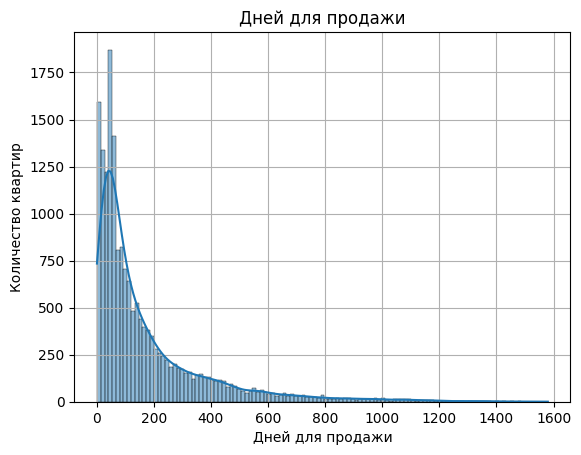

In [65]:
sns.histplot(good_data.loc[good_data['days_exposition']>=0 ,'days_exposition'], kde=True)
plt.title("Дней для продажи")
plt.xlabel("Дней для продажи")
plt.ylabel("Количество квартир")
plt.grid()
plt.show()

Биноминальное распределение.

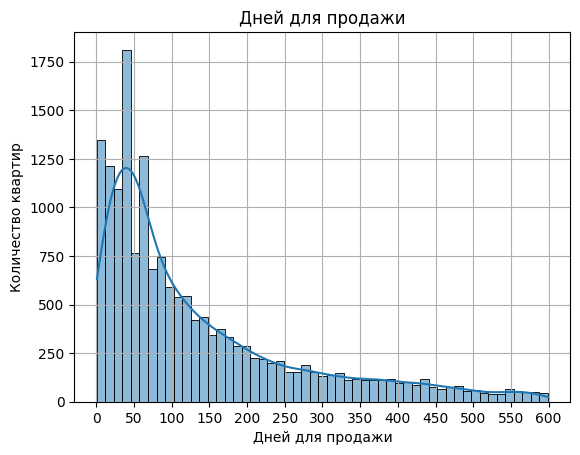

In [66]:
days_to_sell = good_data.loc[(good_data['days_exposition']<600) & (good_data['days_exposition']>=0), 'days_exposition']
sns.histplot(days_to_sell, kde=True)
plt.title("Дней для продажи")
plt.xlabel("Дней для продажи")
plt.ylabel("Количество квартир")
plt.xticks(range(0,650,50))
plt.grid()
plt.show()

In [67]:
days_to_sell = good_data.loc[data['days_exposition']>=0, 'days_exposition']
days_to_sell.describe()

,days_exposition
count,17826.000000
mean,172.209694
std,210.293074
min,1.000000
25%,44.000000
50%,91.000000
75%,218.000000
max,1580.000000


# 4.2.2 Вывод по количеству дней для продажи


Продажа обычно происходит в течении 100 дней с момента выставления. Быстрые до 50 дней. Долгие - более года.

# Задача 3

3)Какие факторы больше всего влияют на общую (полную) стоимость объекта?
Изучите, зависит ли цена от:

*  общей площади;
*  жилой площади;
*  площади кухни;
*  количества комнат;
*  этажа, на котором расположена квартира (первый, последний, другой);
*   даты размещения (день недели, месяц, год).

Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.





# 4.3.1 Определим какие факторы больше всего влияют на общую (полную) стоимость объекта?

In [68]:
print(good_data.corr(numeric_only=True).sort_values(by='last_price', ascending=False)['last_price'].head(10))
print()
print(good_data.corr(numeric_only=True).sort_values(by='last_price', ascending=True)['last_price'].head(10))

last_price          1.000000
total_area          0.681866
price_for_metre     0.651045
living_area         0.562241
kitchen_area        0.495328
ceiling_height      0.439289
rooms               0.417958
airports_nearest    0.343750
ponds_around3000    0.279696
floors_total        0.244589
Name: last_price, dtype: float64

studio                   -0.031334
open_plan                -0.018278
weekday_of_public        -0.012848
month_of_public           0.002946
year_of_public            0.006897
is_apartment              0.015962
days_exposition           0.039127
balcony                   0.082671
cityCenters_nearest_km    0.120925
cityCenters_nearest       0.129736
Name: last_price, dtype: float64


Наибольшая корреляция с ценой:


*   Общая площадь
*   Цена за метр
*   Жилая площадь
*   Площадь кухни
*   Высота потолка
*   Количество комнат


Построим точечные диаграммы и гистограммы зависимости цены от рассматриваемых факторов.

`total_area`:

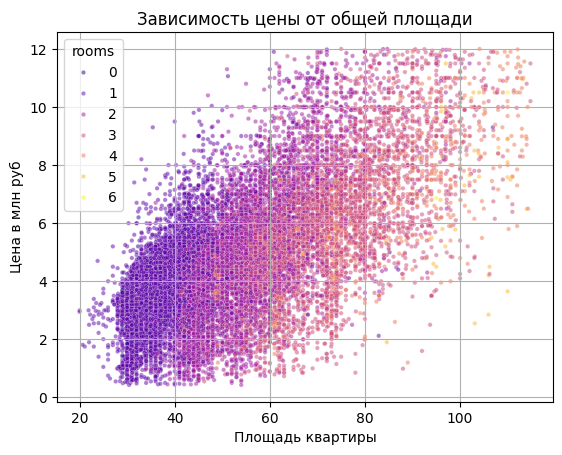

In [69]:
sns.scatterplot(data = good_data, x = 'total_area',y = good_data['last_price']/10**6,s = 10, alpha = 0.5, hue = 'rooms', palette='plasma')
plt.title("Зависимость цены от общей площади")
plt.ylabel("Цена в млн руб")
plt.xlabel("Площадь квартиры")
plt.grid()
plt.show()

Видно тренд, что при увеличении площади квартиры её цена увеличивается. Однако существуют и исключения, которые можно объяснить географическим положением, ремонтом и т.п.

`living_area`:

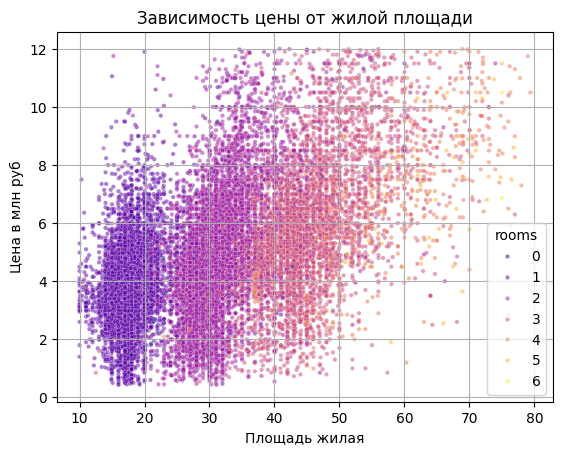

In [70]:
sns.scatterplot(data = good_data, x = 'living_area',y = good_data['last_price']/10**6,s = 10, alpha = 0.5, hue = 'rooms', palette='plasma')
plt.title("Зависимость цены от жилой площади")
plt.ylabel("Цена в млн руб")
plt.xlabel("Площадь жилая")
plt.grid()
plt.show()

Сильной тенденции нет, но при увеличении площади жилья после в среднем цена растёт.

Видим четкое разделение в зависимости от количества комнат.

`kitchen_area`:

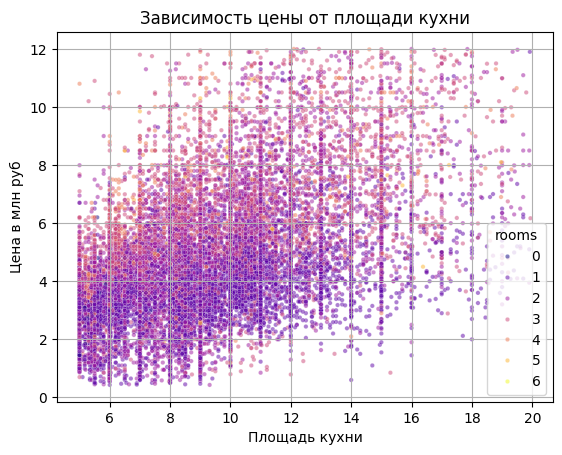

In [71]:
sns.scatterplot(data = good_data, x = 'kitchen_area',y = good_data['last_price']/10**6,s = 10, alpha = 0.5, hue = 'rooms', palette='plasma')
plt.title("Зависимость цены от площади кухни")
plt.ylabel("Цена в млн руб")
plt.xlabel("Площадь кухни")
plt.grid()
plt.show()

Никакой тенценции не прослеживается

`rooms`:

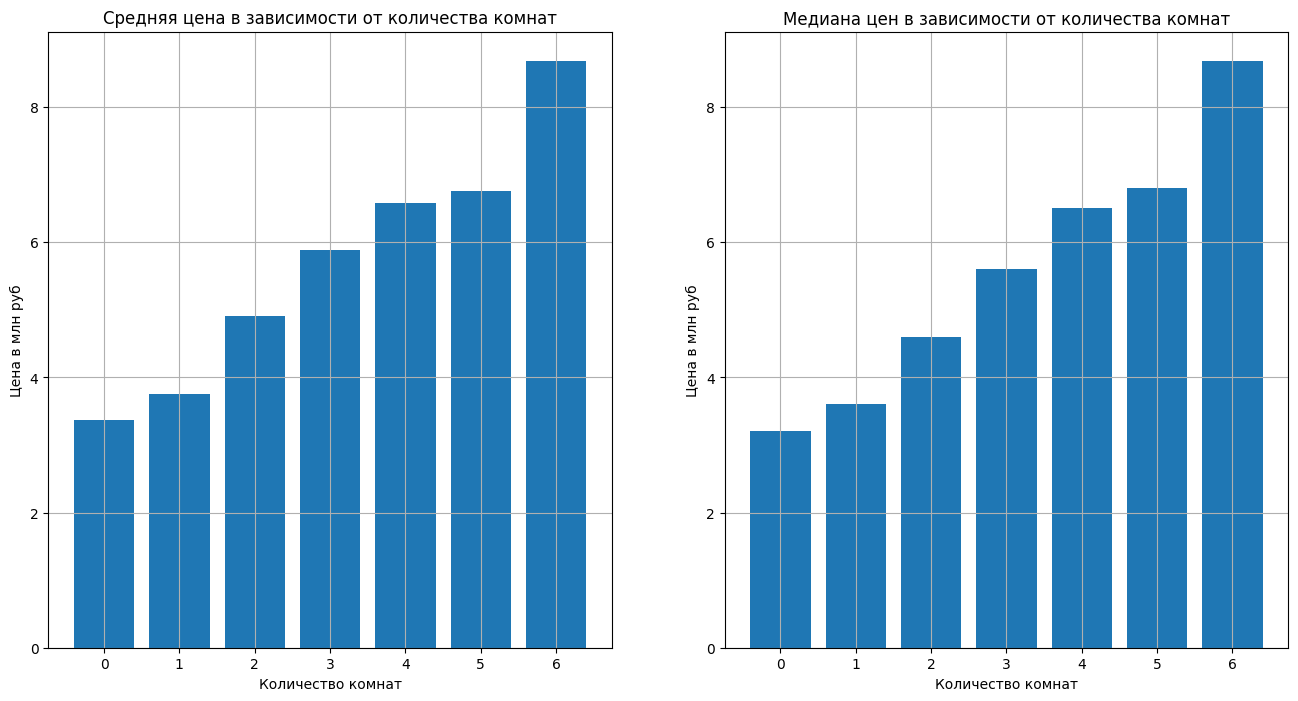

In [72]:
fig = plt.figure(figsize=(16,8))

grouped_1 = good_data.groupby(by='rooms')
a_1 = grouped_1['last_price'].mean()/10**6
x_1=[np.array([])]
y_1=[np.array([])]
for i in range(len(a_1)):
  x_1 = np.append(x_1,a_1.index[i])
  y_1 = np.append(y_1,a_1[i])
ax_1 = fig.add_subplot(1,2,1)
ax_1.bar(x_1, y_1)
ax_1.grid()
ax_1.set_title('Средняя цена в зависимости от количества комнат')
ax_1.set_ylabel('Цена в млн руб')
ax_1.set_xlabel('Количество комнат')
grouped_2 = good_data.groupby(by='rooms')
a_2 = grouped_2['last_price'].median()/10**6
x_2=[np.array([])]
y_2=[np.array([])]
for i in range(len(a_2)):
  x_2 = np.append(x_2,a_2.index[i])
  y_2 = np.append(y_2,a_2[i])
ax_2 = fig.add_subplot(1,2,2)
ax_2.bar(x_2, y_2)
ax_2.grid()
ax_2.set_title('Медиана цен в зависимости от количества комнат')
ax_2.set_xlabel('Количество комнат')
ax_2.set_ylabel('Цена в млн руб')
plt.show()

При увеличении количества комнат однозначно увеличивается и цена.

`ceiling_height`:

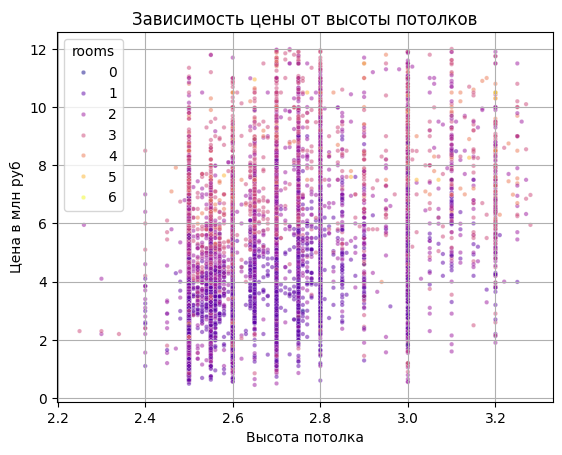

In [73]:
sns.scatterplot(data = good_data, x = 'ceiling_height', y = good_data['last_price']/10**6, s = 10, alpha = 0.5, hue = 'rooms', palette='plasma')
plt.title("Зависимость цены от высоты потолков")
plt.ylabel("Цена в млн руб")
plt.xlabel("Высота потолка")
plt.grid()
plt.show()

Никаких выводов сделать нельзя. Оказывается бывают даже дорогие квартиры с низкими потолками, бывают дешевые с высокими.

`type_of_floor`:

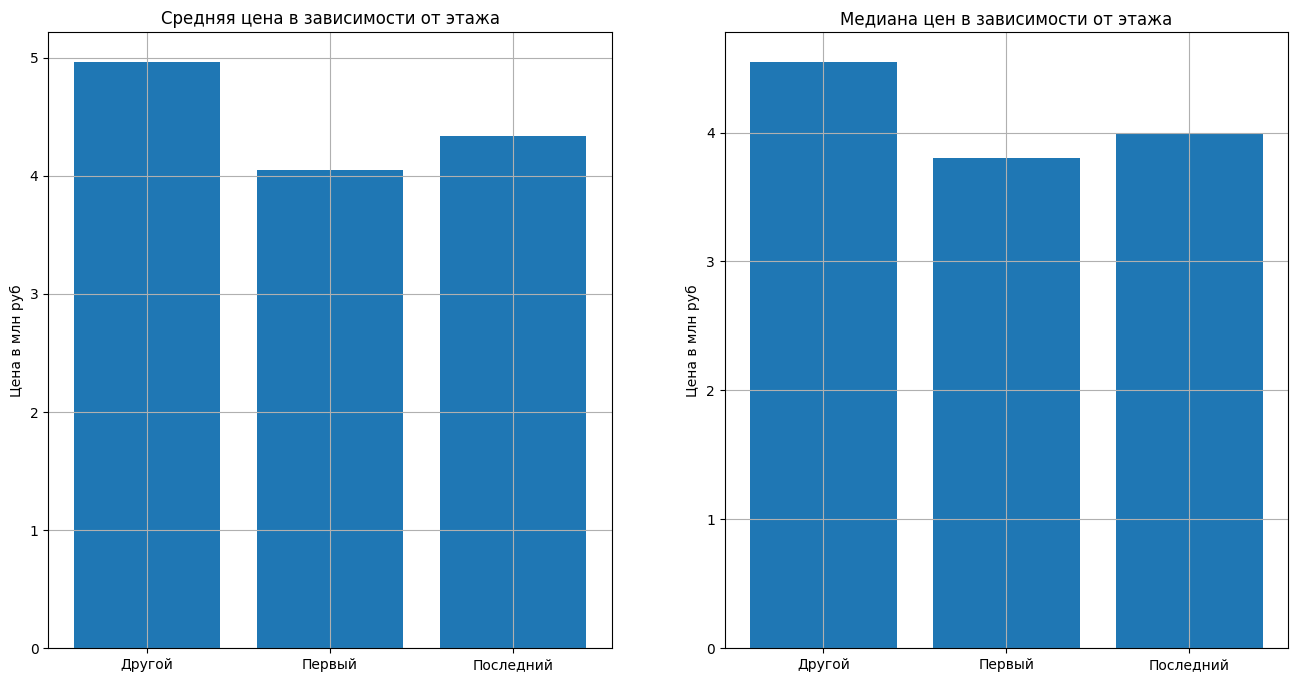

In [74]:
fig = plt.figure(figsize=(16,8))

grouped_1 = good_data.groupby(by='type_of_floor')
a_1 = grouped_1['last_price'].mean()/10**6
x_1=[np.array([])]
y_1=[np.array([])]
for i in range(len(a_1)):
  x_1 = np.append(x_1,a_1.index[i])
  y_1 = np.append(y_1,a_1.iloc[i])
ax_1 = fig.add_subplot(1,2,1)
ax_1.bar(x_1, y_1)
ax_1.grid()
ax_1.set_title('Средняя цена в зависимости от этажа')
ax_1.set_ylabel('Цена в млн руб')
grouped_2 = good_data.groupby(by='type_of_floor')
a_2 = grouped_2['last_price'].median()/10**6
x_2=[np.array([])]
y_2=[np.array([])]
for i in range(len(a_2)):
  x_2 = np.append(x_2,a_2.index[i])
  y_2 = np.append(y_2,a_2.iloc[i])
ax_2 = fig.add_subplot(1,2,2)
ax_2.bar(x_2, y_2)
ax_2.grid()
ax_2.set_title('Медиана цен в зависимости от этажа')
ax_2.set_ylabel('Цена в млн руб')
plt.show()

Первый этаж - самый дешевый, видимо, мешает шум из окна.

Квартиры на первом этаже, в среднем, дороже квартир первого, но всё еще сильно дешевле остальных квартир. Видимо, покупателей не устраивает близость с крышей и потенциальные проблемы с потолком.

Самые дорогие квартиры находятся между последним и первым этажом. Люди готовы перплатить за комфорт.

`weekday_of_public`:

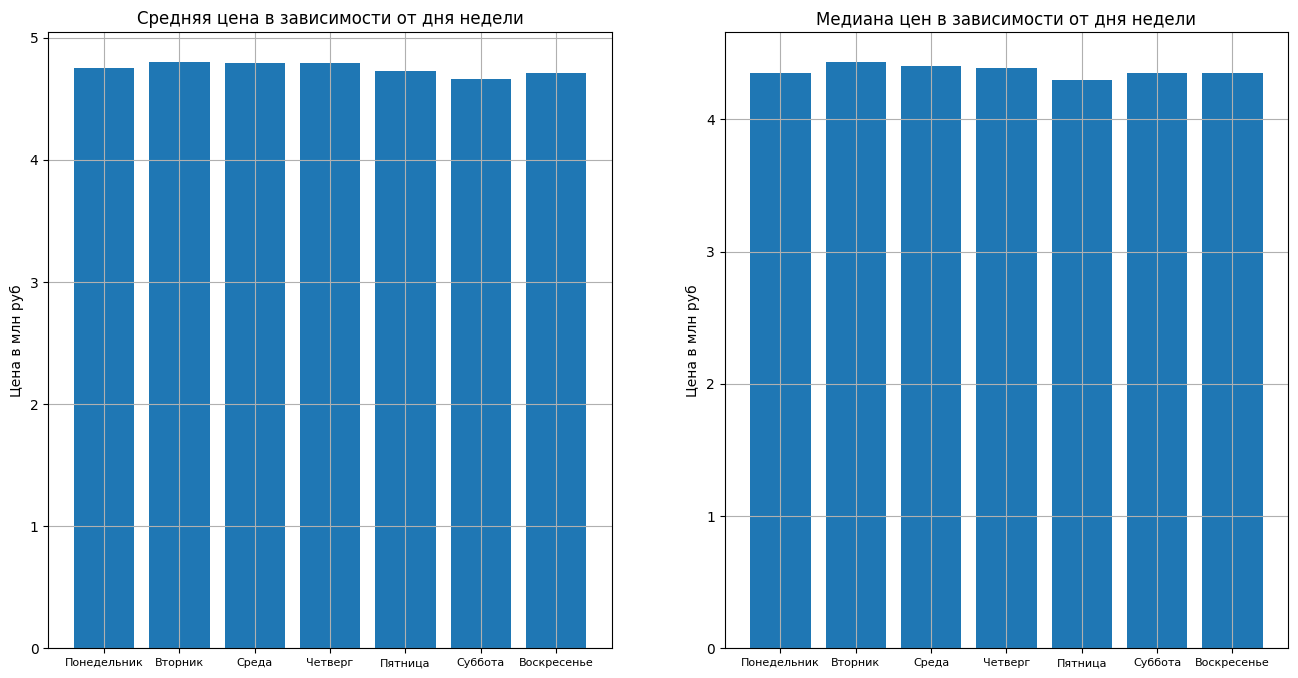

In [75]:
fig = plt.figure(figsize=(16,8))
days = ["Понедельник", "Вторник", "Среда", "Четверг", "Пятница", "Суббота", "Воскресенье"]
grouped_1 = good_data.groupby(by='weekday_of_public')

a_1 = grouped_1['last_price'].mean()/10**6
x_1=[np.array([])]
y_1=[np.array([])]
for i in range(len(a_1)):
  x_1 = np.append(x_1,days[a_1.index[i]])
  y_1 = np.append(y_1,a_1[i])
ax_1 = fig.add_subplot(1,2,1)
ax_1.bar(x_1, y_1)
ax_1.grid()
ax_1.set_title('Средняя цена в зависимости от дня недели')
ax_1.set_ylabel('Цена в млн руб')
ax_1.tick_params(axis='x', labelsize=8)
grouped_2 = good_data.groupby(by='weekday_of_public')
a_2 = grouped_2['last_price'].median()/10**6
x_2=[np.array([])]
y_2=[np.array([])]
for i in range(len(a_2)):
  x_2 = np.append(x_2,days[a_2.index[i]])
  y_2 = np.append(y_2,a_2[i])
ax_2 = fig.add_subplot(1,2,2)
ax_2.bar(x_2, y_2)
ax_2.grid()
ax_2.set_title('Медиана цен в зависимости от дня недели')
ax_2.set_ylabel('Цена в млн руб')
ax_2.tick_params(axis='x', labelsize=8)
plt.show()

Разброс средних цен по сравнению с самой ценой достаточно слабый. Убедимся на числах

In [76]:
print(pd.Series(y_1).describe()['std'] / pd.Series(y_1).describe()['mean'] *100)
print(pd.Series(y_2).describe()['std'] / pd.Series(y_2).describe()['mean'] *100)

1.1079838589530793
1.016511437055595


Коэффициент вариации всего 1%. Можно утверждать, что день недели выставления квартиры на продажу никак не влияет на ее цену .

`month_of_public`:

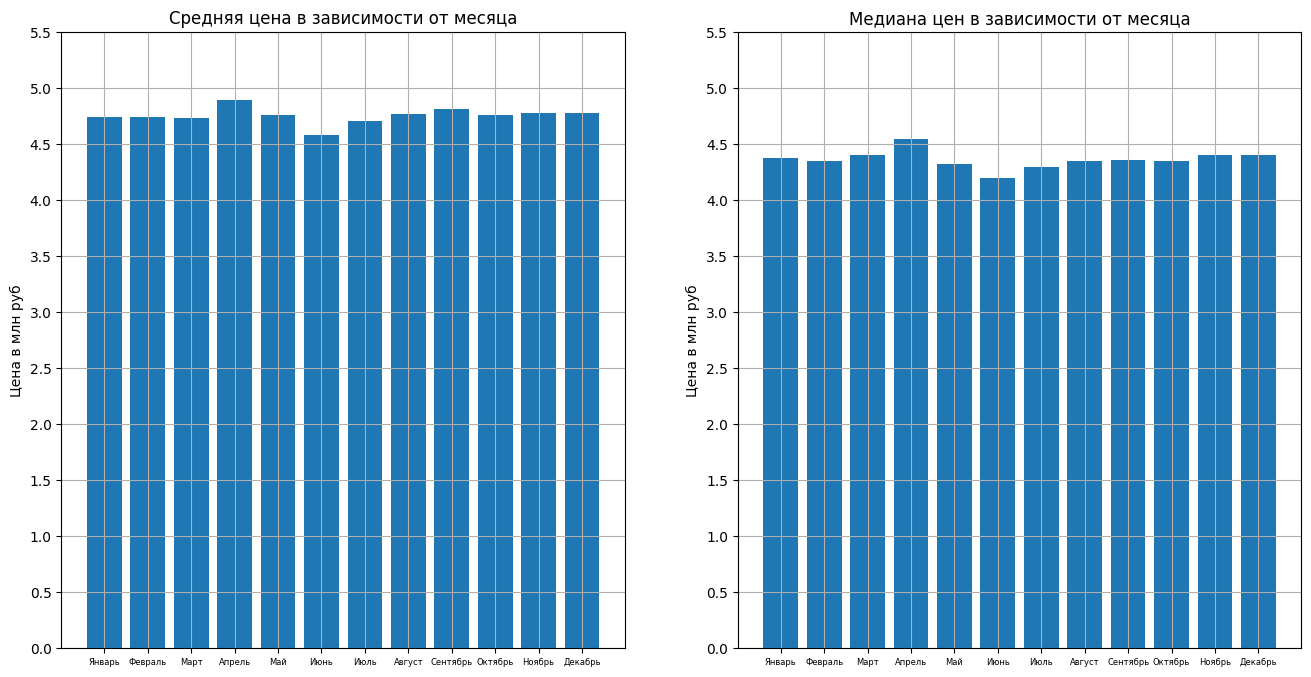

In [77]:
fig = plt.figure(figsize=(16,8))
months = ["Январь", "Февраль", "Март", "Апрель", "Май", "Июнь", "Июль", "Август", "Сентябрь", "Октябрь", "Ноябрь", "Декабрь"]
grouped = good_data.groupby(by='month_of_public')
a_1 = grouped['last_price'].mean()/10**6
x_1=[np.array([])]
y_1=[np.array([])]
for i in range(1,len(a_1)+1):
  x_1 = np.append(x_1, months[i-1])
  y_1 = np.append(y_1,a_1[i])
ax_1 = fig.add_subplot(1,2,1)
ax_1.bar(x_1, y_1)
ax_1.grid()
ax_1.set_title('Средняя цена в зависимости от месяца')
ax_1.set_ylabel('Цена в млн руб')
ax_1.set_yticks(np.arange(0,6,0.5))
ax_1.tick_params(axis='x', labelsize=6)
a_2 = grouped['last_price'].median()/10**6
x_2=[np.array([])]
y_2=[np.array([])]
for i in range(1,len(a_2)+1):
  x_2 = np.append(x_2,months[i-1])
  y_2 = np.append(y_2,a_2[i])
ax_2 = fig.add_subplot(1,2,2)
ax_2.bar(x_2, y_2)
ax_2.grid()
ax_2.set_title('Медиана цен в зависимости от месяца')
ax_2.set_ylabel('Цена в млн руб')
ax_2.set_yticks(np.arange(0,6,0.5))
ax_2.tick_params(axis='x', labelsize=6)
plt.show()

Судя по графикам, всё аналогично дням недели. Разброс средних цен по сравнению с самой ценой достаточно слабый. Убедимся на числах

In [78]:
print(pd.Series(y_1).describe()['std'] / pd.Series(y_1).describe()['mean'] *100)
print(pd.Series(y_2).describe()['std'] / pd.Series(y_2).describe()['mean'] *100)

1.507217239156978
1.8556153216561158


Коэффициент вариации снова около 1%. Можно утверждать, что день месяца выставления квартиры на продажу никак не влияет на ее цену .

`year_of_public`:

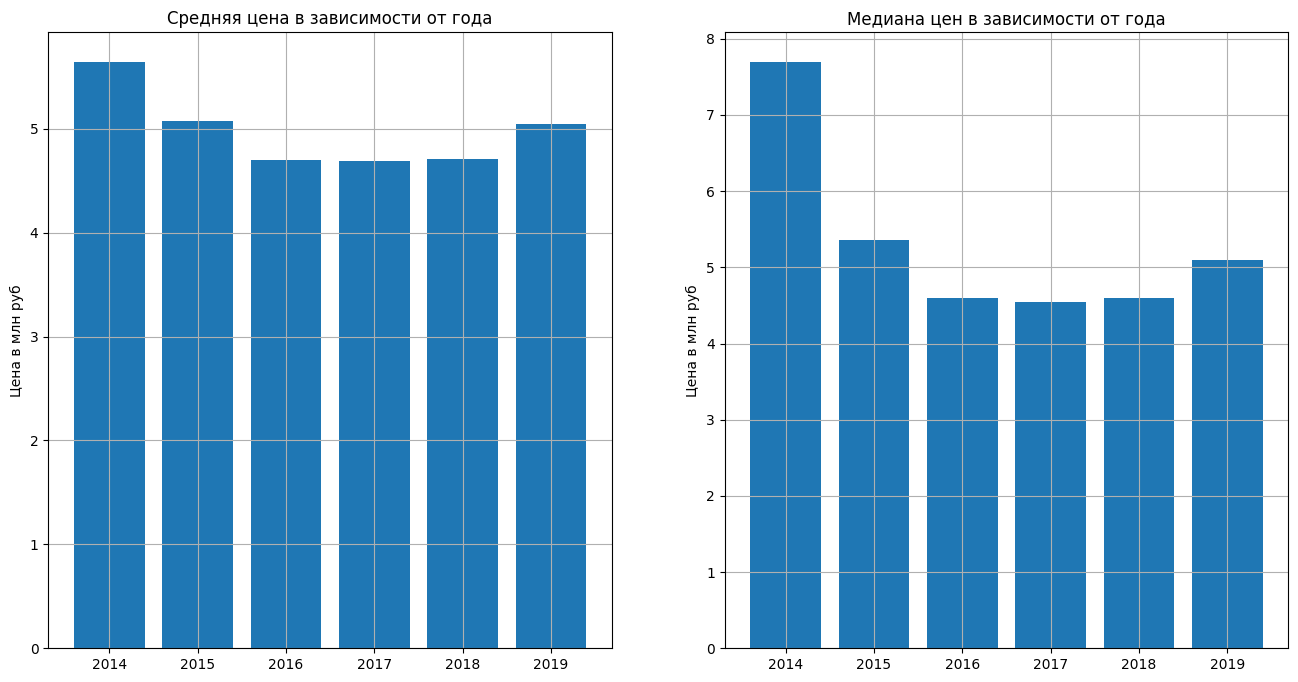

In [79]:
fig = plt.figure(figsize=(16,8))

grouped_1 = good_data.groupby(by='year_of_public')
a_1 = grouped_1['last_price'].mean()/10**6
x_1=[np.array([])]
y_1=[np.array([])]
for i in range(len(a_1)):
  x_1 = np.append(x_1,a_1.index[i])
  y_1 = np.append(y_1,a_1[a_1.index[i]])
ax_1 = fig.add_subplot(1,2,1)
ax_1.bar(x_1, y_1)
ax_1.grid()
ax_1.set_title('Средняя цена в зависимости от года')
ax_1.set_ylabel('Цена в млн руб')
grouped_2 = data.groupby(by='year_of_public')
a_2 = grouped_2['last_price'].median()/10**6
x_2=[np.array([])]
y_2=[np.array([])]
for i in range(len(a_2)):
  x_2 = np.append(x_2,a_2.index[i])
  y_2 = np.append(y_2,a_2[a_2.index[i]])
ax_2 = fig.add_subplot(1,2,2)
ax_2.bar(x_2, y_2)
ax_2.grid()
ax_2.set_title('Медиана цен в зависимости от года')
ax_2.set_ylabel('Цена в млн руб')
plt.show()

Видно, что после 2014 года цены сильно упали и только в 2019 году начали снова дорожать.

In [80]:
good_data.pivot_table(index='year_of_public', values='last_price', aggfunc='count')

,last_price
year_of_public,
2014,81
2015,936
2016,2348
2017,7031
2018,7412
2019,2460


Но заметим, что в 2014 году количество выставленных квартир ничтожно мало по сравнении с другими годами, поэтому сделать однозначных выводов про этот год нельзя.

Можно лишь заметить, что с 2015 по 2017 год цены падали, а в 2019 году начался интенсивный рост цен.

# 4.3.2 Факторы, сильно влияющие на цену недвижимости:

Можно сделать вывод, что на цену недвижимости прежде всего влияют следующие факторы:

*   Площадь квартиры - чем больше площадь, тем больше и цена.
*   Жилая площадь - аналогично с площадью квартиры.
*   Количество комнат - чем больше комнат, чем больше площадь, а значит, и цена.
*   Тип этажа - на первых и последних этажах цена существенно меньше, чем на остальных.
*   Год выставления квартиры на продажу - возможна сильная зависимость от внешних факторов

Никакого влияния на цену не оказывают:

* День недели выставления квартиры на продажу
* Номер месяца выставления квартиры на продажу
* Площадь кухни - в дорогих квартирах размер кухни особо не отличается от дешевых

#Задача 4



4)
Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений — постройте сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов.


Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.

Опишите, как стоимость объектов зависит от расстояния до центра города — постройте график изменения средней цены для каждого километра от центра Петербурга.

#4.4.1 Сводная таблица

Для подсчета средей цены будем использовать медиану, чтобы минимизировать влияние оставшихся выбросов.

Построим сводную таблицу: имя населенного пункта, количество объявлений, средняя цена за метр.

Отсортируем таблицу по возрастанию количества квартир. Выберем первые 10 населенных пунктов

In [81]:
data_pivot = good_data.groupby(by='locality_name').agg({'price_for_metre': 'median', 'last_price':'count'})
data_pivot = data_pivot.rename(columns={'last_price':'amount_flats'})
data_pivot_10 = data_pivot.sort_values(by='amount_flats', ascending=False)[:10]
print(data_pivot_10)

                 price_for_metre  amount_flats
locality_name                                 
Санкт-Петербург         101613.0         12813
Мурино                   83648.5           514
Шушары                   76439.0           422
Кудрово                  94986.0           408
Всеволожск               65541.0           377
Колпино                  74690.0           328
Парголово                91984.5           320
Пушкин                   98133.0           318
Гатчина                  67797.0           293
Выборг                   57895.0           209


#4.4.2 Населённые пункты с самой высокой и низкой стоимостью квадратного метра.

Отсортируем полученную таблицу по возрастанию средней цены за метр

In [82]:
print(data_pivot_10.sort_values(by='price_for_metre'))

                 price_for_metre  amount_flats
locality_name                                 
Выборг                   57895.0           209
Всеволожск               65541.0           377
Гатчина                  67797.0           293
Колпино                  74690.0           328
Шушары                   76439.0           422
Мурино                   83648.5           514
Парголово                91984.5           320
Кудрово                  94986.0           408
Пушкин                   98133.0           318
Санкт-Петербург         101613.0         12813


Самый дешевый квадратный метр - в Выборге - 57613 руб.


Самый дорогой - в Санкт-Петербурге - 101613 руб.

In [83]:
print(data_pivot.sort_values(by='price_for_metre'))

                 price_for_metre  amount_flats
locality_name                                 
Старополье               11000.0             3
Свирь                    11481.5             2
Вахнова Кара             11688.0             1
Выскатка                 12335.5             2
Совхозный                12629.5             2
...                          ...           ...
Левашово                 96998.0             1
Пушкин                   98133.0           318
Сестрорецк               98958.0           155
Санкт-Петербург         101613.0         12813
Зеленогорск             101666.5            20

[300 rows x 2 columns]


А самая дешевый метр квадратный из всех объявлений - в деревне старополье - 11000 руб.

# 4.4.3 Как стоимость объектов зависит от расстояния до центра города

Ранее мы посчитали расстояние до центра в километрах. Теперь выделим квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислим среднюю цену каждого километра.

Можно предположить, что цена убывает по мере убывания от центра города, т.к. в центре обычно состредоточена "вся жизнь города".

Построим сводную таблицу `data_pivot_SPb`для всех квартир из Санкт-Петербурга, в которой будут столбцы `last_price ` и `cityCenters_nearest_km`.

In [84]:
data_pivot_SPb = good_data.loc[(good_data['locality_name']=='Санкт-Петербург') & (good_data['cityCenters_nearest_km']>=0), ['price_for_metre', 'cityCenters_nearest_km']]
print(data_pivot_SPb)

       price_for_metre  cityCenters_nearest_km
2                92786                      13
7               110545                      11
9                88525                      15
10              127525                      13
15              119231                      14
...                ...                     ...
23687            82051                      16
23688            91089                      14
23689           100567                      16
23690           105769                       6
23691           129904                       4

[12813 rows x 2 columns]


Сгруппируем все квартиры по удаленности от центра города и посчитаем среднюю цену на каждом километре.

In [85]:
data_pivot_cityCenters_nearest_km = data_pivot_SPb.pivot_table(index='cityCenters_nearest_km', values='price_for_metre', aggfunc=['median','count'])
data_pivot_cityCenters_nearest_km.columns=['median_price_for_metre','count']
data_pivot_cityCenters_nearest_km['median_price_for_metre'] /= 1000
print(data_pivot_cityCenters_nearest_km)

                        median_price_for_metre  count
cityCenters_nearest_km                               
0                                     110.0410     63
1                                     113.3330     93
2                                     106.8745    124
3                                     102.0515    268
4                                     117.2255    436
5                                     117.9270    439
6                                     115.0520    284
7                                     117.2840    289
8                                     107.5465    518
9                                     103.2610    590
10                                    102.9975    818
11                                    102.0320   1282
12                                    102.3080   1367
13                                    102.9130   1280
14                                    101.2840   1404
15                                     97.8720   1275
16                          

Проверим корреляцию

In [86]:
x = np.array(data_pivot_cityCenters_nearest_km.index)
y = np.array(data_pivot_cityCenters_nearest_km['median_price_for_metre'])
np.corrcoef(x,y)

array([[ 1.        , -0.86087441],
       [-0.86087441,  1.        ]])

Корреляция близка к -1, значит присутствует очень сильная обратно пропорциональная зависимость удаленности от центра и цены за метр

Для наглядности построим график изменения средней цены для каждого километра от центра Петербурга.

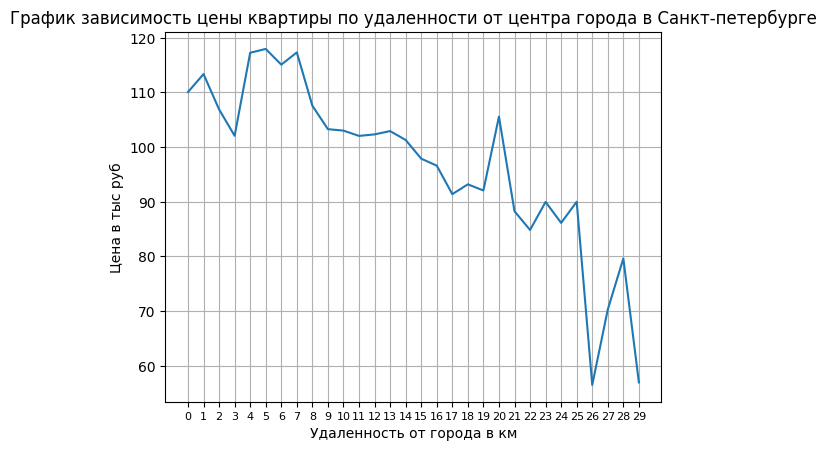

In [87]:
x = np.array(data_pivot_cityCenters_nearest_km.index)
y = np.array(data_pivot_cityCenters_nearest_km['median_price_for_metre'])
plt.plot(x,y)
plt.title('График зависимость цены квартиры по удаленности от центра города в Санкт-петербурге')
plt.xlabel('Удаленность от города в км')
plt.ylabel('Цена в тыс руб')
plt.xticks(range(0,30,1))
plt.tick_params(axis='x', labelsize=8)
plt.grid()
plt.show()

И на числах, и на графике присутствует очевидная тенденция - при удаленности от центра города цена уменьшается. Логически это легко объяснимо.

# 5. Общий вывод


Был проведен анализ рынка недвижимости Санкт-Петербурга и соседних населённых пунктах за несколько лет.

Работа представила из себя:
  * Обработка пропусков. Заполнение на основе понимания типа и причин пропусков, а также поиск связи между столбцами и заполнение столбцов с  пропусками данными из других столбов.
  * Исправление потенциальных ошибок в типах данных и в самих данных.
  * Добавление новых столбов для последующего анализа.
  * Выдвижение гипотез
  * Исследование зависимостей между данными и построение различных графиков для установления соответствия между величинами.
  * Проверка предположений и фактов, ответ на поставленные вопросы

Выводы, которые можно сделать исходя из проведенного исследования:

1.   На цену недвижимости прежде всего влияют следующие факторы:
  *   Площадь квартиры - чем больше площадь, тем больше и цена
  *   Жилая площадь - аналогично с площадью квартиры
  *   Количество комнат - чем больше комнат, чем больше площадь, а значит, и цена
  *   Удаленность от центра города - чем дальше недвижимость до центра, тем дешевле сам объект. Данная особенность характерна Санкт-Петербургу
  * Тип этажа - на первых и последних этажах цена существенно меньше, чем на остальных.
  * Год выставления квартиры на продажу - возможна сильная зависимость от внешних факторов
2.   Наиболее распространненые квартиры:
  *   Общая площадь 30-60 м
  *   Количество комнат: 1-2
  *   Цена: 3-4 млн рублей.
  *   Высота потолков: 2.5-2.8 м
  *   Не первый и не последний этаж
  *   Расстояние до центра города 10-15 км.
3.   В среднем квартира продается около 100 дней. Быстрыми можно назвать продажи до 50 дней, а все продажи от года - долгими.